###  CARGA DE LIBRERIAS


In [5]:
import missingno as mo
import pandas as pd
import os
from pathlib import Path
import numpy as np
import holidays # para la columna de festivo/no festivo
import Funciones_limpieza as lmp

### CARGA DE DATOS

In [6]:
ruta_csv = os.path.join("..", "..", "Datos", "DatosOriginales", "cancellation_data_for_mondragon_unibertsitatea_2024.csv")

# Cargar el CSV en un DataFrame
df = pd.read_csv(ruta_csv, true_values=['yes'], false_values=['no'],
    decimal='.', sep=',', thousands=',')

# Verificar que se cargó correctamente
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,...,4,False,False,0,15.92,15.92,checked_out,NaN,NaN,NaN
1,"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,...,2,True,False,0,117.78,13.09,checked_out,NaN,NaN,NaN
2,"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,...,1,False,True,8,755.65,125.94,checked_out,NaN,NaN,NaN
3,"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,...,1,False,True,1,186.37,186.37,checked_out,NaN,NaN,NaN
4,"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,...,1,False,False,0,77.02,77.02,checked_out,NaN,NaN,NaN


### DATA DISCOVERING

##### tipo de columnas

In [7]:
print(df.columns)
df.dtypes # hay que convertir las de date a tipo fecha y las numericas a numericos

Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'brand',
       'asset_opening_date', 'available_units', 'business_segment', 'rate',
       'rate_group_name', 'rate_type', 'completed_entry_forms_count',
       'all_entry_forms_completed', 'last_entry_form_completed_at',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancelled_at', 'cancellation_reason',
       'cancellation_lead_time'],
      dtype='object')


booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    object
checkin_day                      object
adult_count                       int64
child_count                       int64
origin                           object
travel_agency_name               object
requested_category               object
requested_category_name          object
asset                            object
asset_type                       object
brand                            object
asset_opening_date               object
available_units                   int64
business_segment                 object
rate                             object
rate_group_name                  object
rate_type                        object
completed_entry_forms_count     float64
all_entry_forms_completed          bool
last_entry_form_completed_at     object


### LIMPIEZA

### 1. CORRECCION TIPO DE COLUMNAS CON LA FUNCION DE .PY DE FUNCIONES_LIMPIEZA

In [8]:
df_bien = lmp.detectar_tipos_columnas(df)['dataframe_transformado']

c:\Anio2526\RETOS\RETO06_NARANJA\Scripts\Scripts_Limpieza_de_datos\Funciones_limpieza.py:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fechas = pd.to_datetime(serie, errors="coerce", infer_datetime_format=True)
c:\Anio2526\RETOS\RETO06_NARANJA\Scripts\Scripts_Limpieza_de_datos\Funciones_limpieza.py:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fechas = pd.to_datetime(serie, errors="coerce", infer_datetime_format=True)
c:\Anio2526\RETOS\RETO06_NARANJA\Scripts\Scripts_Limpieza_de_datos\Funciones_limpieza.py:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict vers

In [9]:
df_bien.isna().sum() == df.isna().sum() # se ha hecho bien la corrección de tipo de columnas

booked_at                       True
checkin_time                    True
checkout_time                   True
lead_time                       True
lenght_of_stay                  True
checkin_month                   True
checkin_day                     True
adult_count                     True
child_count                     True
origin                          True
travel_agency_name              True
requested_category              True
requested_category_name         True
asset                           True
asset_type                      True
brand                           True
asset_opening_date              True
available_units                 True
business_segment                True
rate                            True
rate_group_name                 True
rate_type                       True
completed_entry_forms_count     True
all_entry_forms_completed       True
last_entry_form_completed_at    True
returning_inhabitant            True
recurrence                      True
l

In [10]:
print(df.duplicated().sum())
df_bien.duplicated().sum()

2306


2306

Corregimos a numerico total_adr y reservation net value

In [11]:
df = df_bien

### 2. DUPLICADOS

In [12]:
df.duplicated().sum()

2306

In [13]:
df[df.duplicated] # hay registros que son exactamente iguales y no es posible que coincida con la misma reserva porque han reservado exactamente en la misma hora. 
# Ademas, no hay solo dos filas duplicadas sino que se repite la fila mas de una vez. Por eso nos vamos a quedar solo con el primer registro


,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
63,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,True,1,25.16,25.16,cancelled,"Jan 2, 2023, 21:21",refuse_to_detail,0.0
65,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,True,1,25.16,25.16,cancelled,"Jan 2, 2023, 21:21",refuse_to_detail,0.0
66,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,False,False,0,21.07,21.07,cancelled,"Jan 2, 2023, 21:21",refuse_to_detail,0.0
83,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,4,0,email,...,1,False,True,4,274.53,91.51,checked_out,NaN,NaN,NaN
85,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,3,0,email,...,1,False,True,4,251.34,83.78,checked_out,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56142,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,False,True,1,154.76,154.76,cancelled,"Mar 1, 2023, 15:49",refuse_to_detail,0.0
56143,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,False,True,1,154.76,154.76,cancelled,"Mar 1, 2023, 15:49",refuse_to_detail,0.0
56144,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,False,False,0,141.38,141.38,cancelled,"Mar 1, 2023, 15:49",refuse_to_detail,0.0
56181,2023-03-03 19:39:00,2023-11-23 15:00:00,2023-11-25 11:00:00,265,2,November,Thursday,2,0,channel_manager,...,1,False,False,0,430.79,215.40,cancelled,"Nov 15, 2023, 21:13",changed_plans,257.0


In [14]:
df = df.drop_duplicates() # quitamos duplicados
print(df.shape)
df.columns

(54142, 36)


Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'brand',
       'asset_opening_date', 'available_units', 'business_segment', 'rate',
       'rate_group_name', 'rate_type', 'completed_entry_forms_count',
       'all_entry_forms_completed', 'last_entry_form_completed_at',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancelled_at', 'cancellation_reason',
       'cancellation_lead_time'],
      dtype='object')

### Se va a eliminar la columna brand porque no nos aporta información

In [15]:
df = df.drop(columns = 'brand')

### 3. ANALISIS DE NA'S

In [16]:
df.isna().sum() # missings en las columnas: travel_agency, completed_entry_forms,last_entry_form, total_adr, cancelled_at, cancellation_reason, cancellation_lead_time


booked_at                           0
checkin_time                        0
checkout_time                       0
lead_time                           0
lenght_of_stay                      0
checkin_month                       0
checkin_day                         0
adult_count                         0
child_count                         0
origin                              0
travel_agency_name              16533
requested_category                  0
requested_category_name             0
asset                               0
asset_type                          0
asset_opening_date                  0
available_units                     0
business_segment                    0
rate                                0
rate_group_name                     0
rate_type                           0
completed_entry_forms_count      1961
all_entry_forms_completed           0
last_entry_form_completed_at    13658
returning_inhabitant                0
recurrence                          0
libere_commu

<Axes: >

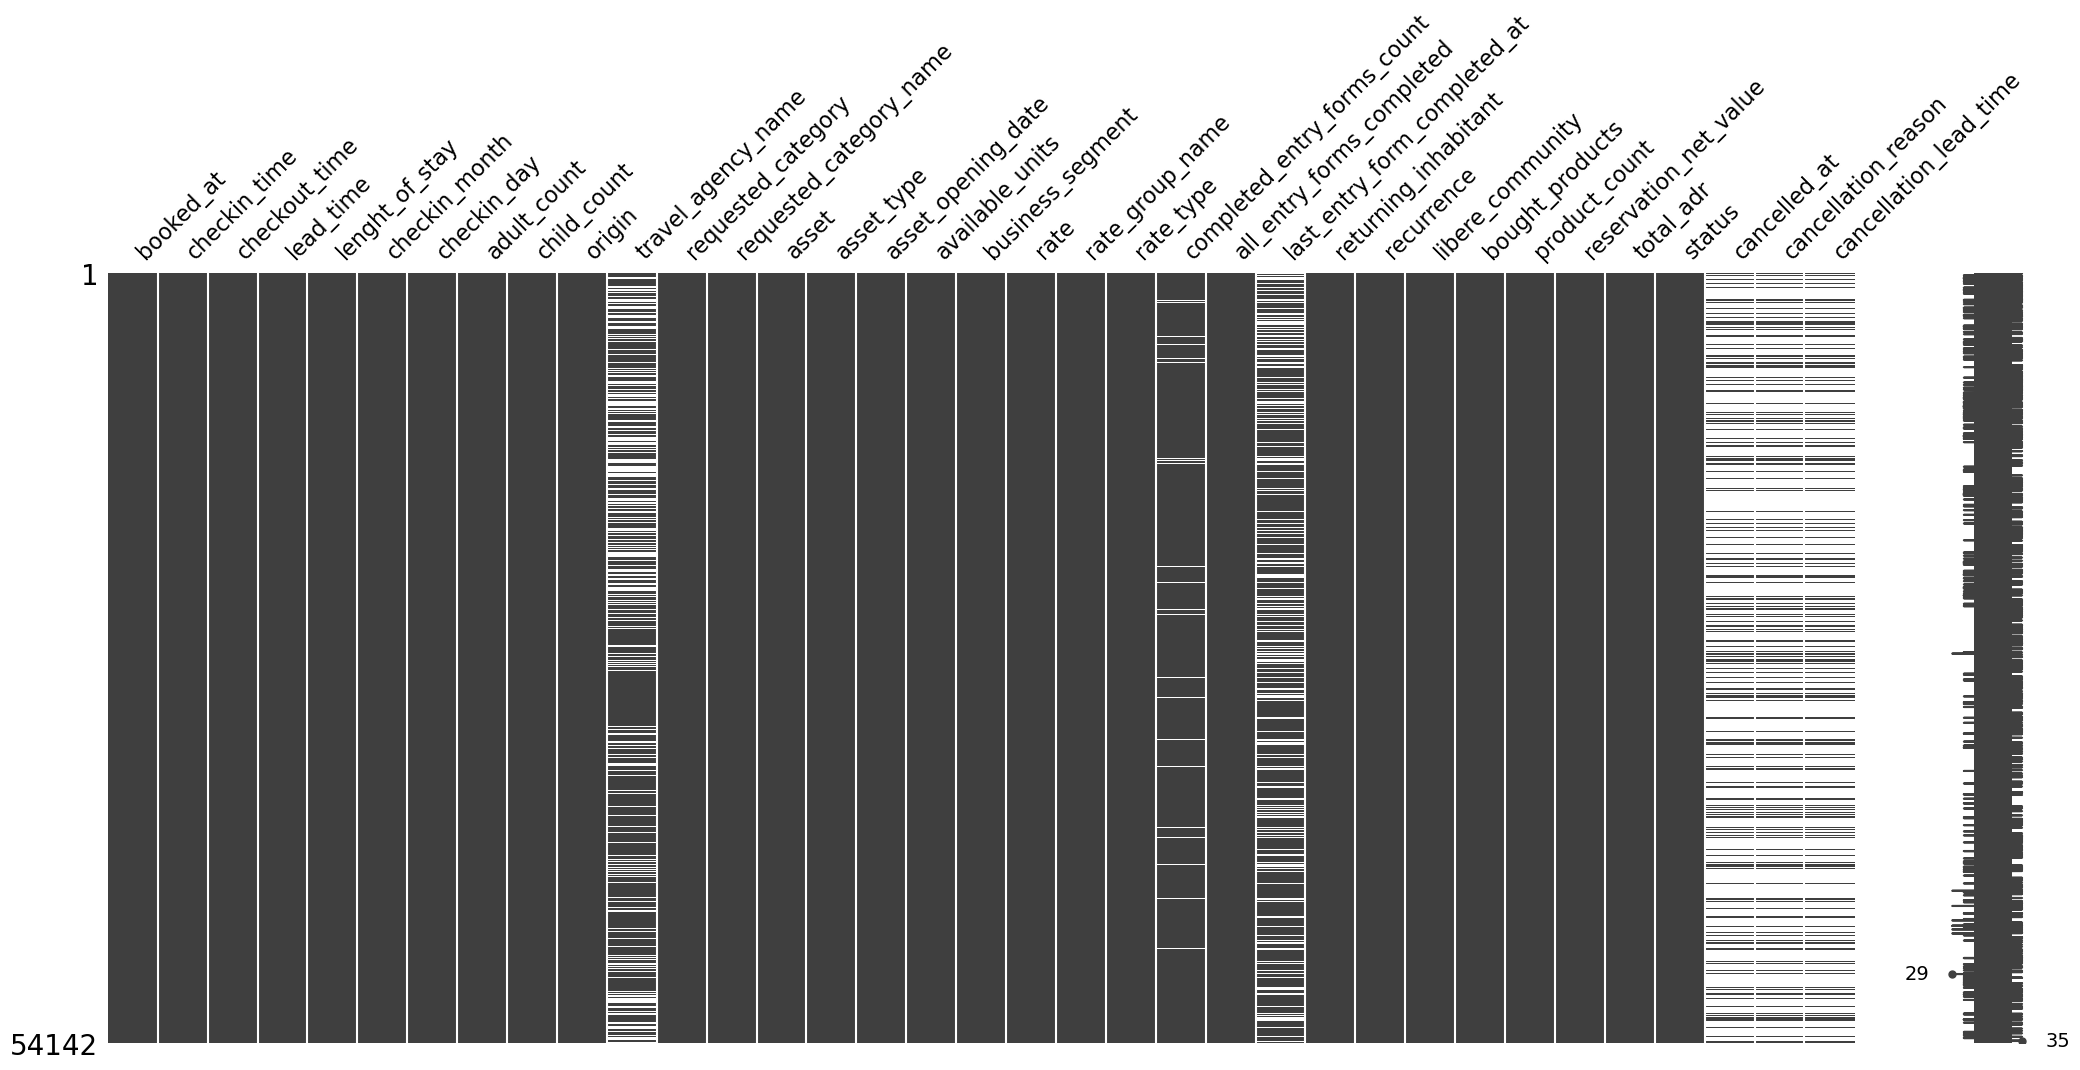

In [17]:
mo.matrix(df) # las columnas de cancelación estan correlacionadas, es decir, si un registro tiene un valor ausente en cancelled_at también lo tienen en cancellation_reason y cancellation_lead_time
# las demas columnas en un principio no estan correlacionadas

<Axes: >

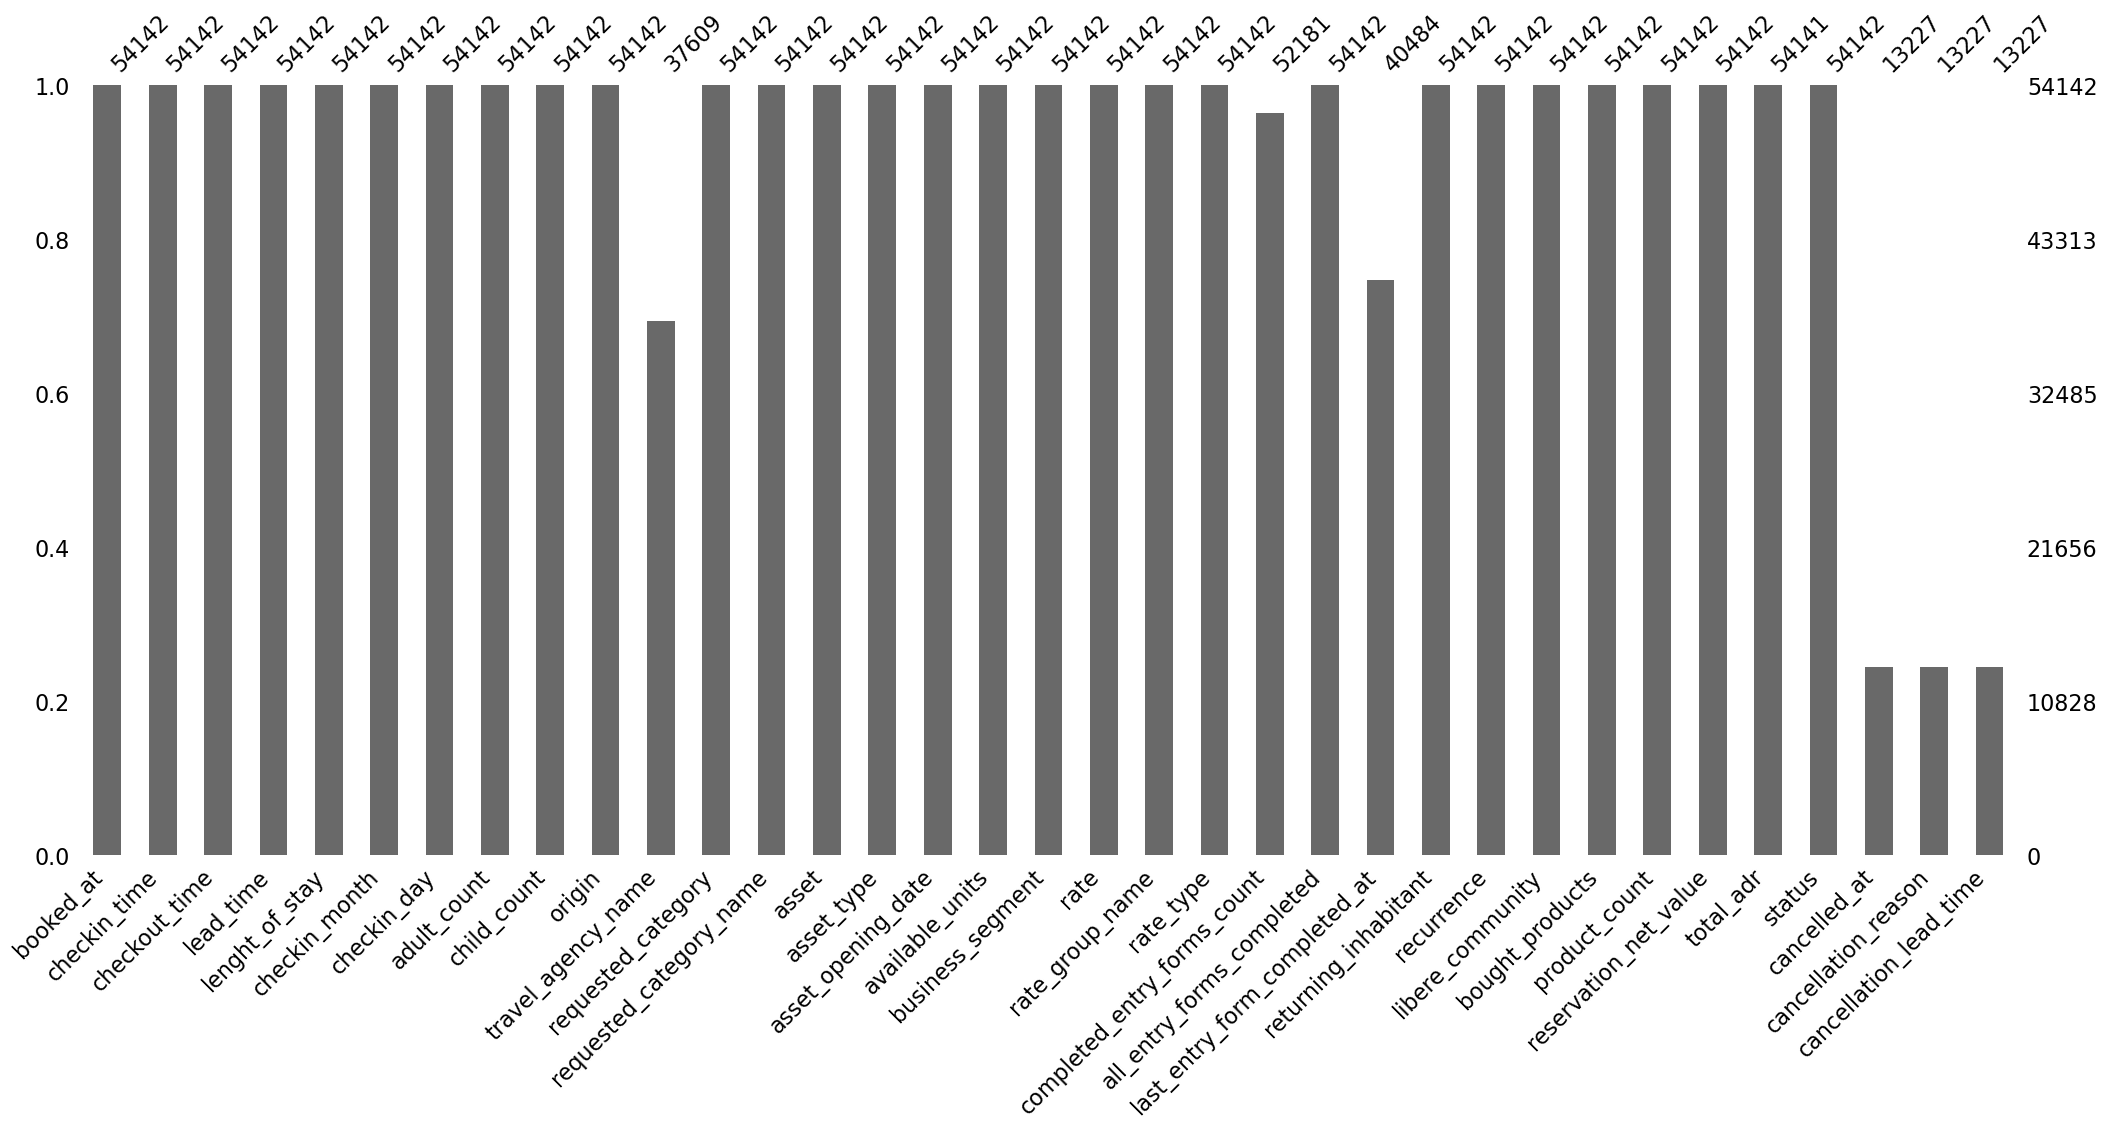

In [18]:
mo.bar(df)

## 4. IMPUTACIÓN DE VALORES AUSENTES: 
 travel_agency,  completed_entry_forms, last_entry_form, cancelled_at, cancellation_reason, cancellation_lead_time

### travel agency name

In [19]:
df['travel_agency_name'] # si la reserva no se ha hecho por agencia, es NA --> IMPUTAMOS PONIENDO "RESERVA SIN AGENCIA"
df['travel_agency_name'] = df['travel_agency_name'].fillna('Reserva sin agencia') 

In [20]:
df['travel_agency_name'].isna().sum() # no hay ningun NA

0

### completed entry forms 

In [21]:
# la columna 'all entry forms' la cual indica si se han completado formularios de check in, esta relacionada con la columna 
# 'completed entry forms count', que indica cuantos formularios se han rellenado.  Si la columna 'all entry forms' es yes
# la columna 'completed entry forms count' debe de ser un numero mayor que uno (ha completado mas de un formulario)

# por eso si all entry forms es no imputamos completed entry forms con 0 (ya que 'all_entry_forms' no tiene ningun valor missing)

df.loc[df['all_entry_forms_completed']== 'no', 'completed_entry_forms_count'] = 0
print(df['completed_entry_forms_count'].isna().sum())




1961


##### verificar que si la cantidad de formularios completados es mayor que 0, la columna de 'all entry forms es yes'

In [22]:
# mirar si hay alguna fila que es mayor que uno en completed entry forms count y que luego en all entry forms count es 'no' --> si hay cambiarlo a 'yes'
df.loc[df['completed_entry_forms_count']>0,'all_entry_forms_completed'] = 'yes'

df[(df['completed_entry_forms_count']>0) & (df['all_entry_forms_completed']== 'no')] # se han corregido las filas incorrectas




C:\Users\togui\AppData\Local\Temp\ipykernel_496\4105337138.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'yes' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['completed_entry_forms_count']>0,'all_entry_forms_completed'] = 'yes'


,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time


### cancellation reason, cancelation lead time 

In [23]:
# los que son NA es porque no han cancelado (se ha mirado si podria ser que se haya cancelado pero no se haya dado informacion para poder imputarlo de 
# otra forma pero si se ha cancelado y no hay informacion del porqué pone: refuse to detail. También se ha mirado si restando el momento de check in por el dia de cancelacion 
# se podria obtener cancellation lead time pero todas estan hechas, es decir no faltan valores para calcular)
df['cancellation_reason'] = df['cancellation_reason'].fillna('not cancelled')

df['cancellation_lead_time'] = df['cancellation_lead_time'].fillna(0)



### total_adr_ relacionada con RESERVATION_NET_VALUE 

In [24]:
print(df.loc[df['total_adr'].isna(),['total_adr','reservation_net_value']])  # el único valor que es NA es cuando el valor de la reserva es 0, imputar total_adr también con 0
# ya que ese dia no generaran ingresos
df['total_adr'] = df['total_adr'].fillna(0)

       total_adr  reservation_net_value
23009        NaN                    0.0


In [25]:
df['total_adr'].isna().sum()

0

### COMPROBACIONES

Adult_count debe de ser mayor que 0 porque segun la normativa tiene que haber almenos un adulto, eliminamos aquellas filas que los adultos sean 0

In [26]:
df.drop(df[(df['adult_count'] == 0)].index, inplace=True)

Si no tenemos fecha de cancelled_at status debe de ser cancel

In [27]:
df.loc[df['cancelled_at'].notna(), 'status'] = 'cancelled'

Reservation net value no puede ser negativo si no se ha cancelado

In [28]:
df.drop(df[(df['reservation_net_value']<0) & df['cancelled_at'].isna()].index, inplace=True)

La columna lead time hay algunos registros que no se han cancelado y que el registro es minus. Se ha intentado calcularlo haciendo la reseta entre el dia del checkin y el dia de reserva pero sigue siendo minus, por lo que es algun fallo de la base de datos. Al ser solo 78 registros de 52177, se ha decidido omitirlos

In [29]:
df.loc[df['lead_time']<0,['lead_time','status','completed_entry_forms_count','all_entry_forms_completed','booked_at','checkin_time','checkout_time']]
df = df[df['lead_time'] >= 0]
df.shape

(53982, 35)

## NUEVAS COLUMNAS A PARTIR DE COLUMNAS DE FECHA O PARA UTILIZAR EN EL CLUSTERING/MODELADO

### 1. COLUMNA: ha cancelado para hacer operaciones

In [30]:
# sacar la columna de cancelacion 
df.loc[df['cancellation_reason'] == 'not cancelled', 'ha_cancelado'] = False
df.loc[df['cancellation_reason'] != 'not cancelled', 'ha_cancelado'] = True

### Analizamos columna 'last entry forms completed at'

### Esta columna indica el momento en el que se ha rellenado el último formulario. No obstante, para los modelos o el clustering no nos interesa que las columnas sean de tipo fecha porque no nos aportan información. Además hay valores ausentes en esta columna. 
Por eso, se ha decidido hacer una nueva columna que indique si el ultimo check-in ha sido realizado antes de la estancia (considerando el primer dia de la estancia también, es decir, si se ha hecho el check-in el primer dia o antes), durante la estancia (desde el segundo hasta el ultimo dia, ultimo día sin incluir) o después de la estancia (incluido el ultimo dia). De esta manera, obtenemos una columna categorica que sí nos aporte informacion y la podamos utilizar para el clustering o modelos predictivos

In [31]:
print((df['last_entry_form_completed_at'].isna() == df['cancellation_reason'].isna()).sum()) # esto es normal porque los que han cancelado, no han completado ningun formulario
print(df['last_entry_form_completed_at'].isna().sum()) # hay mas valores missing de los que deberia, porque hay registros en los que la reserva
# no ha sido cancelada pero que no se sabe cuando ha sido completada ese formulario, por ello vamos a crear una nueva columna a partir de esta

# por ahora lo imputamos con null
df['last_entry_form_completed_at'].fillna(np.nan)


40398
13584


0        Dec 31, 2022, 10:42
1        Dec 21, 2022, 17:30
2        Dec 30, 2022, 14:16
3        Sep 24, 2022, 13:10
4        Nov 11, 2022, 11:55
                ...         
56443    Dec 30, 2023, 08:58
56444    Dec 30, 2023, 13:04
56445    Dec 28, 2023, 18:29
56446    Dec 28, 2023, 18:34
56447    Dec 30, 2023, 08:23
Name: last_entry_form_completed_at, Length: 53982, dtype: object

### 2. NUEVA COLUMNA: MOMENTO CHECK IN ANTES, DURANTE Y DESPUÉS

In [32]:
# Para poder sacar informacion sobre el check-in vamos a hacer una columna que indique si el ultimo chek-in se ha realizado antes, durante o después de la estancia
# vamos a considerar antes: primer dia de estancia o antes
# durante: desde el segundo hata el ultimo dia de check in, ultimo dia sin incluir
# después: último día de estancia + después
df = df.reset_index(drop=True) # para que no de problemas

condiciones = [
    df['last_entry_form_completed_at'] <= df['checkin_time'],  # antes: primer día o antes
    (df['last_entry_form_completed_at'] > df['checkin_time']) & (df['last_entry_form_completed_at'] < df['checkout_time']),  # durante
    df['last_entry_form_completed_at'] >= df['checkout_time']  # después
]

valores = ['antes', 'durante', 'después']

# Añadir un default string para NaT
df['momento_checkin'] = np.select(condiciones, valores, default='desconocido') # si el valor es NA (o porque se ha cancelado o porque no tenemos ese dato) que ponga desconocido 

# Ahora si la reserva a sido cancelada, que ponga cancelado y sino que ponga desconocido
df['momento_checkin'] = np.where(df['ha_cancelado'], 'cancelacion', df['momento_checkin'])



# ahora ya hemos sacado informacion de la fecha del ultimo formulario convertiendola en categorica para poder utilizarlo en el clustering
# y podemos eliminar esta columna
df = df.drop(columns=['last_entry_form_completed_at'])
df['momento_checkin']



0              antes
1              antes
2              antes
3              antes
4              antes
            ...     
53977          antes
53978          antes
53979          antes
53980          antes
53981    cancelacion
Name: momento_checkin, Length: 53982, dtype: object

#### verificamos que cuando es ha cancelado true el momento de check in es cancelacion y sino desconocido

In [33]:
print(df[df['ha_cancelado']==True]['momento_checkin'])
df[df['momento_checkin']=='desconocido'].shape

5        cancelacion
6        cancelacion
9        cancelacion
11       cancelacion
13       cancelacion
            ...     
53969    cancelacion
53973    cancelacion
53975    cancelacion
53976    cancelacion
53981    cancelacion
Name: momento_checkin, Length: 13186, dtype: object


(1372, 36)

#### 3. NUEVA COLUMNA: RATIO DE FORMULARIOS COMPLETADOS POR PERSONAS EN LA RESERVA:
    - NUMERO FORMULARIOS / NUMERO PERSONAS RESERVA

In [34]:
df['ratio_asistencia'] =  df['completed_entry_forms_count']/(df['adult_count'] + df['child_count'])  

df.loc[df['ratio_asistencia']==0] # los que son 0 es porque o han cancelado o no han acudido

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time,ha_cancelado,momento_checkin,ratio_asistencia
5,2022-11-25 17:50:00,2023-01-01 15:00:00,2023-01-02 12:00:00,37,1,January,Sunday,2,1,channel_manager,...,0,74.40,74.40,cancelled,"Dec 28, 2022, 21:05",refuse_to_detail,33.0,True,cancelacion,0.0
6,2022-11-26 04:10:00,2023-01-01 15:00:00,2023-01-03 12:00:00,36,2,January,Sunday,3,0,channel_manager,...,0,57.55,28.78,cancelled,"Dec 26, 2022, 23:57",refuse_to_detail,30.0,True,cancelacion,0.0
9,2022-12-11 12:51:00,2023-01-01 15:00:00,2023-01-08 12:00:00,21,7,January,Sunday,2,0,channel_manager,...,0,37.61,5.37,cancelled,"Dec 12, 2022, 14:07",refuse_to_detail,1.0,True,cancelacion,0.0
11,2022-12-19 19:29:00,2023-01-01 15:00:00,2023-01-05 12:00:00,13,4,January,Sunday,2,2,channel_manager,...,0,76.25,19.06,cancelled,"Dec 28, 2022, 20:57",refuse_to_detail,9.0,True,cancelacion,0.0
13,2022-12-20 20:41:00,2023-01-01 15:00:00,2023-01-02 12:00:00,12,1,January,Sunday,3,0,channel_manager,...,0,61.96,61.96,cancelled,"Jan 2, 2023, 14:49",no_show,12.0,True,cancelacion,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53957,2023-10-13 09:17:00,2023-12-30 15:00:00,2024-01-01 11:00:00,78,2,December,Saturday,2,0,channel_manager,...,0,441.59,220.80,cancelled,"Dec 29, 2023, 19:37",refuse_to_detail,77.0,True,cancelacion,0.0
53961,2023-10-27 13:30:00,2023-12-30 15:00:00,2024-01-01 11:00:00,64,2,December,Saturday,2,0,channel_manager,...,0,356.53,178.27,cancelled,"Nov 30, 2023, 13:19",refuse_to_detail,33.0,True,cancelacion,0.0
53969,2023-12-03 22:11:00,2023-12-30 15:00:00,2024-01-02 11:00:00,27,3,December,Saturday,1,1,direct_channel,...,0,397.63,132.54,cancelled,"Dec 3, 2023, 22:32",payment_missed,0.0,True,cancelacion,0.0
53973,2023-12-30 12:25:00,2023-12-30 15:00:00,2024-01-05 11:00:00,0,6,December,Saturday,4,0,telephone,...,0,990.48,165.08,cancelled,"Dec 30, 2023, 13:26",changed_plans,0.0,True,cancelacion,0.0


### 4. NUEVA COLUMNA: RATIOS DE CANCELACIÓN


Para poder sacar informacion sobre los meses en los que más cancelaciones se realizan, se va calcular este ratio: CANCELACIONES DE LA ESTANCIA DE ESE MES/RESERVAS DE ESE MES, es decir, de las reservas que habia previstas para ese mes, cuantas han sido canceladas. Luego, hacemos una columna booleana que indique si ese mes es una zona roja o no dependiendo del ratio de las cancelaciones. Se va a considerar que si ha pasado por una zona roja si el ratio es mayor que la media (indicando con 1). 


In [35]:
# el ratio lo calculamos asi:
    # 1. Agrupar por el mes de reserva y contar por cada mes la cantidad de reservas
    # 2. Filtrar el data frame por las reservas que han sido canceladas 
    # 3. Agrupar por el mes del check-in del data frame de las reservas canceladas y sacar cuantas cancelaciones ha habido de las reservas de ese mes
    # 4. Sacar la columna del ratio haciendo la división


# agrupar por el mes de reserva y contar por cada mes la cantidad de reservas
agrupacion_reservas_mes = df.value_counts('checkin_month')
# filtrar por las cancelaciones
df_cancelaciones = df[df['ha_cancelado'] == True]

# agrupar y calcular numero de cancelaciones por mes
agrupacion_cancelaciones_mes = df_cancelaciones.value_counts('checkin_month')

# sacar la columna de ratio 
ratio = (agrupacion_cancelaciones_mes/agrupacion_reservas_mes).sort_values(ascending=False)
print(ratio)


checkin_month
June         0.258322
May          0.253755
March        0.253185
January      0.251710
February     0.251465
November     0.243148
September    0.241022
July         0.240773
August       0.240113
December     0.239724
October      0.238670
April        0.224883
Name: count, dtype: float64


Definir zona roja/verde

In [36]:

media_ratio_cancelaciones = ratio[ratio > ratio.mean()] 
print(media_ratio_cancelaciones)
media_ratios = ratio.mean()
print(media_ratios)
# Para definir la zona roja se va a utilizar la media de los ratios. Si ese mes supera la media, se considerara zona roja, sino no


checkin_month
June        0.258322
May         0.253755
March       0.253185
January     0.251710
February    0.251465
Name: count, dtype: float64
0.24473085132637915


Crear la columna booleana de zona roja y de ratio

In [37]:
df['ratio_cancelaciones_mes_respecto_reservas'] = df['checkin_month'].map(ratio)

# si alguno de los meses de espera (entre resrva y checkin) son de zona roja, que sea 1 sino 0
df['zona_roja'] = np.where(df['ratio_cancelaciones_mes_respecto_reservas'] > media_ratios , 1, 0)

In [38]:
df[['checkin_month', 'booked_at']]

,checkin_month,booked_at
0,January,2022-11-26 16:10:00
1,January,2022-12-21 17:27:00
2,January,2022-09-21 19:46:00
3,January,2022-09-24 12:09:00
4,January,2022-10-18 07:12:00
...,...,...
53977,December,2023-10-13 13:38:00
53978,December,2023-10-13 13:38:00
53979,December,2023-10-17 08:36:00
53980,December,2023-10-17 08:36:00


In [39]:
# verificamos
print(df[['checkin_month','ratio_cancelaciones_mes_respecto_reservas', 'zona_roja']].head())
df[['checkin_month','ratio_cancelaciones_mes_respecto_reservas', 'zona_roja']].tail()


  checkin_month  ratio_cancelaciones_mes_respecto_reservas  zona_roja
0       January                                    0.25171          1
1       January                                    0.25171          1
2       January                                    0.25171          1
3       January                                    0.25171          1
4       January                                    0.25171          1


,checkin_month,ratio_cancelaciones_mes_respecto_reservas,zona_roja
53977,December,0.239724,0
53978,December,0.239724,0
53979,December,0.239724,0
53980,December,0.239724,0
53981,December,0.239724,0


In [40]:
# ahora ya podemos quitar la columna de cancelled_at porque hemos obtenido informacion de esta columna y al ser de tipo fecha, no nos aporta información
df = df.drop(columns=['cancelled_at'])


### 5. NUEVA COLUMNA : Estacion de la reserva

In [41]:
def get_season_string(month:str):
    """Funcion para sacar la estacion dependiendo del mes

    Args:
        month (str): el mes del año

    Returns:
        estacion (str): la estación del año al que pertenece ese mes
    """
    if month in ['December', 'January', 'February']:
        return 'invierno'
    elif month in ['March', 'April', 'May']:
        return 'primavera'
    elif month in ['June', 'July', 'August']:
        return 'verano'
    else:
        return 'otoño'
    
def get_season_int(month:int):
    """Funcion para sacar la estacion dependiendo del mes

    Args:
        month (int): el mes del año

    Returns:
        estacion (str): la estación del año al que pertenece ese mes
    """
    if month in [12,1,2]:
        return 'invierno'
    elif month in [3,4,5]:
        return 'primavera'
    elif month in [6,7,8]:
        return 'verano'
    else:
        return 'otoño'

df['estacion_estancia'] = df['checkin_month'].apply(get_season_string)
df['estacion_reserva'] = df['booked_at'].dt.month.apply(get_season_int)


### NUEVA COLUMNA : Antiguedad del hotel

In [42]:
df['antiguedad_hotel_en_dias'] = (pd.Timestamp.today() - df['asset_opening_date']).dt.days

### NUEVA COLUMNA: Si la estancia es en dias festivos o no

In [43]:
# hay que tener en cuenta los dias festivos del año 2023
#  Configurar país
festivos_espana = holidays.Spain(years=2023) # no elegimos region especifica porque libere tiene apartamentos en mas de una region 
festivos = set(festivos_espana.keys())  # conjunto de fechas tipo datetime.date

# Creamos función para identificar los dias festivos entre checkin y checkout (los dos incluidos)
def hay_festivo_entre(checkin, checkout, festivos):
    """Devuelve True si entre checkin y checkout (ambos incluidos) hay algún festivo."""

    # Convertimos a fechas (sin hora)
    dias_rango = pd.date_range(checkin.normalize(), checkout.normalize(), freq='D') # para obtener todos los dias entre checkin y checkout en dias, normaliza es para que quite la hora, que solo coga el dia
    return any(d.date() in festivos for d in dias_rango) # recorre los dias entremedio y devuelve True si algun dia de estos es festivo

# Creamos la columna
df['es_festivo'] = df.apply(
    lambda row: hay_festivo_entre(row['checkin_time'], row['checkout_time'], festivos),
    axis=1
) 
df[['es_festivo','checkin_time','checkout_time']]


,es_festivo,checkin_time,checkout_time
0,False,2023-01-01 12:00:00,2023-01-02 12:00:00
1,True,2023-01-01 13:09:00,2023-01-10 12:00:00
2,True,2023-01-01 15:00:00,2023-01-07 12:00:00
3,False,2023-01-01 15:00:00,2023-01-02 12:00:00
4,False,2023-01-01 15:00:00,2023-01-02 12:00:00
...,...,...,...
53977,False,2023-12-31 15:00:00,2024-01-01 11:00:00
53978,False,2023-12-31 15:00:00,2024-01-01 11:00:00
53979,False,2023-12-31 15:00:00,2024-01-01 11:00:00
53980,False,2023-12-31 15:00:00,2024-01-01 11:00:00


### NUEVA COLUMNA: Si la estancia cae en finde o no

In [44]:
df['es_finde'] = (df['checkin_day'].isin(['Friday','Saturday'])) & (df['checkout_time'].dt.day_name().isin(['Saturday','Sunday']))  
df[['es_finde','checkin_time','checkout_time','checkin_day','checkout_time']]

,es_finde,checkin_time,checkout_time,checkin_day,checkout_time
0,False,2023-01-01 12:00:00,2023-01-02 12:00:00,Sunday,2023-01-02 12:00:00
1,False,2023-01-01 13:09:00,2023-01-10 12:00:00,Sunday,2023-01-10 12:00:00
2,False,2023-01-01 15:00:00,2023-01-07 12:00:00,Sunday,2023-01-07 12:00:00
3,False,2023-01-01 15:00:00,2023-01-02 12:00:00,Sunday,2023-01-02 12:00:00
4,False,2023-01-01 15:00:00,2023-01-02 12:00:00,Sunday,2023-01-02 12:00:00
...,...,...,...,...,...
53977,False,2023-12-31 15:00:00,2024-01-01 11:00:00,Sunday,2024-01-01 11:00:00
53978,False,2023-12-31 15:00:00,2024-01-01 11:00:00,Sunday,2024-01-01 11:00:00
53979,False,2023-12-31 15:00:00,2024-01-01 11:00:00,Sunday,2024-01-01 11:00:00
53980,False,2023-12-31 15:00:00,2024-01-01 11:00:00,Sunday,2024-01-01 11:00:00


### NUEVA COLUMNA: Ciudad del hotel/apartamento

In [45]:
# KOISI HOTEL = DONOSTIA, SAN SEBASTIAN
df['asset'].unique()

array(['Koisi Hostel', 'Líbere Vitoria', 'Líbere Bilbao Museo',
       'Líbere Bilbao La Vieja', 'Líbere Valencia Abastos',
       'Líbere Valencia Jardín Botánico', 'Líbere Madrid Palacio Real',
       'Líbere Málaga Teatro Romano', 'Líbere Granada Catedral',
       'Líbere Málaga la Merced', 'Líbere Córdoba Patio Santa Marta',
       'Líbere Pamplona Yamaguchi'], dtype=object)

In [46]:
mapeo_ciudades = {
    'Koisi Hostel': 'Donostia',
    'Líbere Vitoria': 'Vitoria',
    'Líbere Bilbao Museo': 'Bilbao',
    'Líbere Bilbao La Vieja': 'Bilbao',
    'Líbere Valencia Abastos': 'Valencia',
    'Líbere Valencia Jardín Botánico': 'Valencia',
    'Líbere Madrid Palacio Real': 'Madrid',
    'Líbere Málaga Teatro Romano': 'Málaga',
    'Líbere Granada Catedral': 'Granada',
    'Líbere Málaga la Merced': 'Málaga',
    'Líbere Córdoba Patio Santa Marta': 'Córdoba',
    'Líbere Pamplona Yamaguchi': 'Pamplona'
}
df['city'] = df['asset'].map(mapeo_ciudades)

### verificamos que el df no tenga ningun missing

In [47]:
df.isna().sum() #todo bien imputado y columnas nuevas creadas

booked_at                                       0
checkin_time                                    0
checkout_time                                   0
lead_time                                       0
lenght_of_stay                                  0
checkin_month                                   0
checkin_day                                     0
adult_count                                     0
child_count                                     0
origin                                          0
travel_agency_name                              0
requested_category                              0
requested_category_name                         0
asset                                           0
asset_type                                      0
asset_opening_date                              0
available_units                                 0
business_segment                                0
rate                                            0
rate_group_name                                 0


<Axes: >

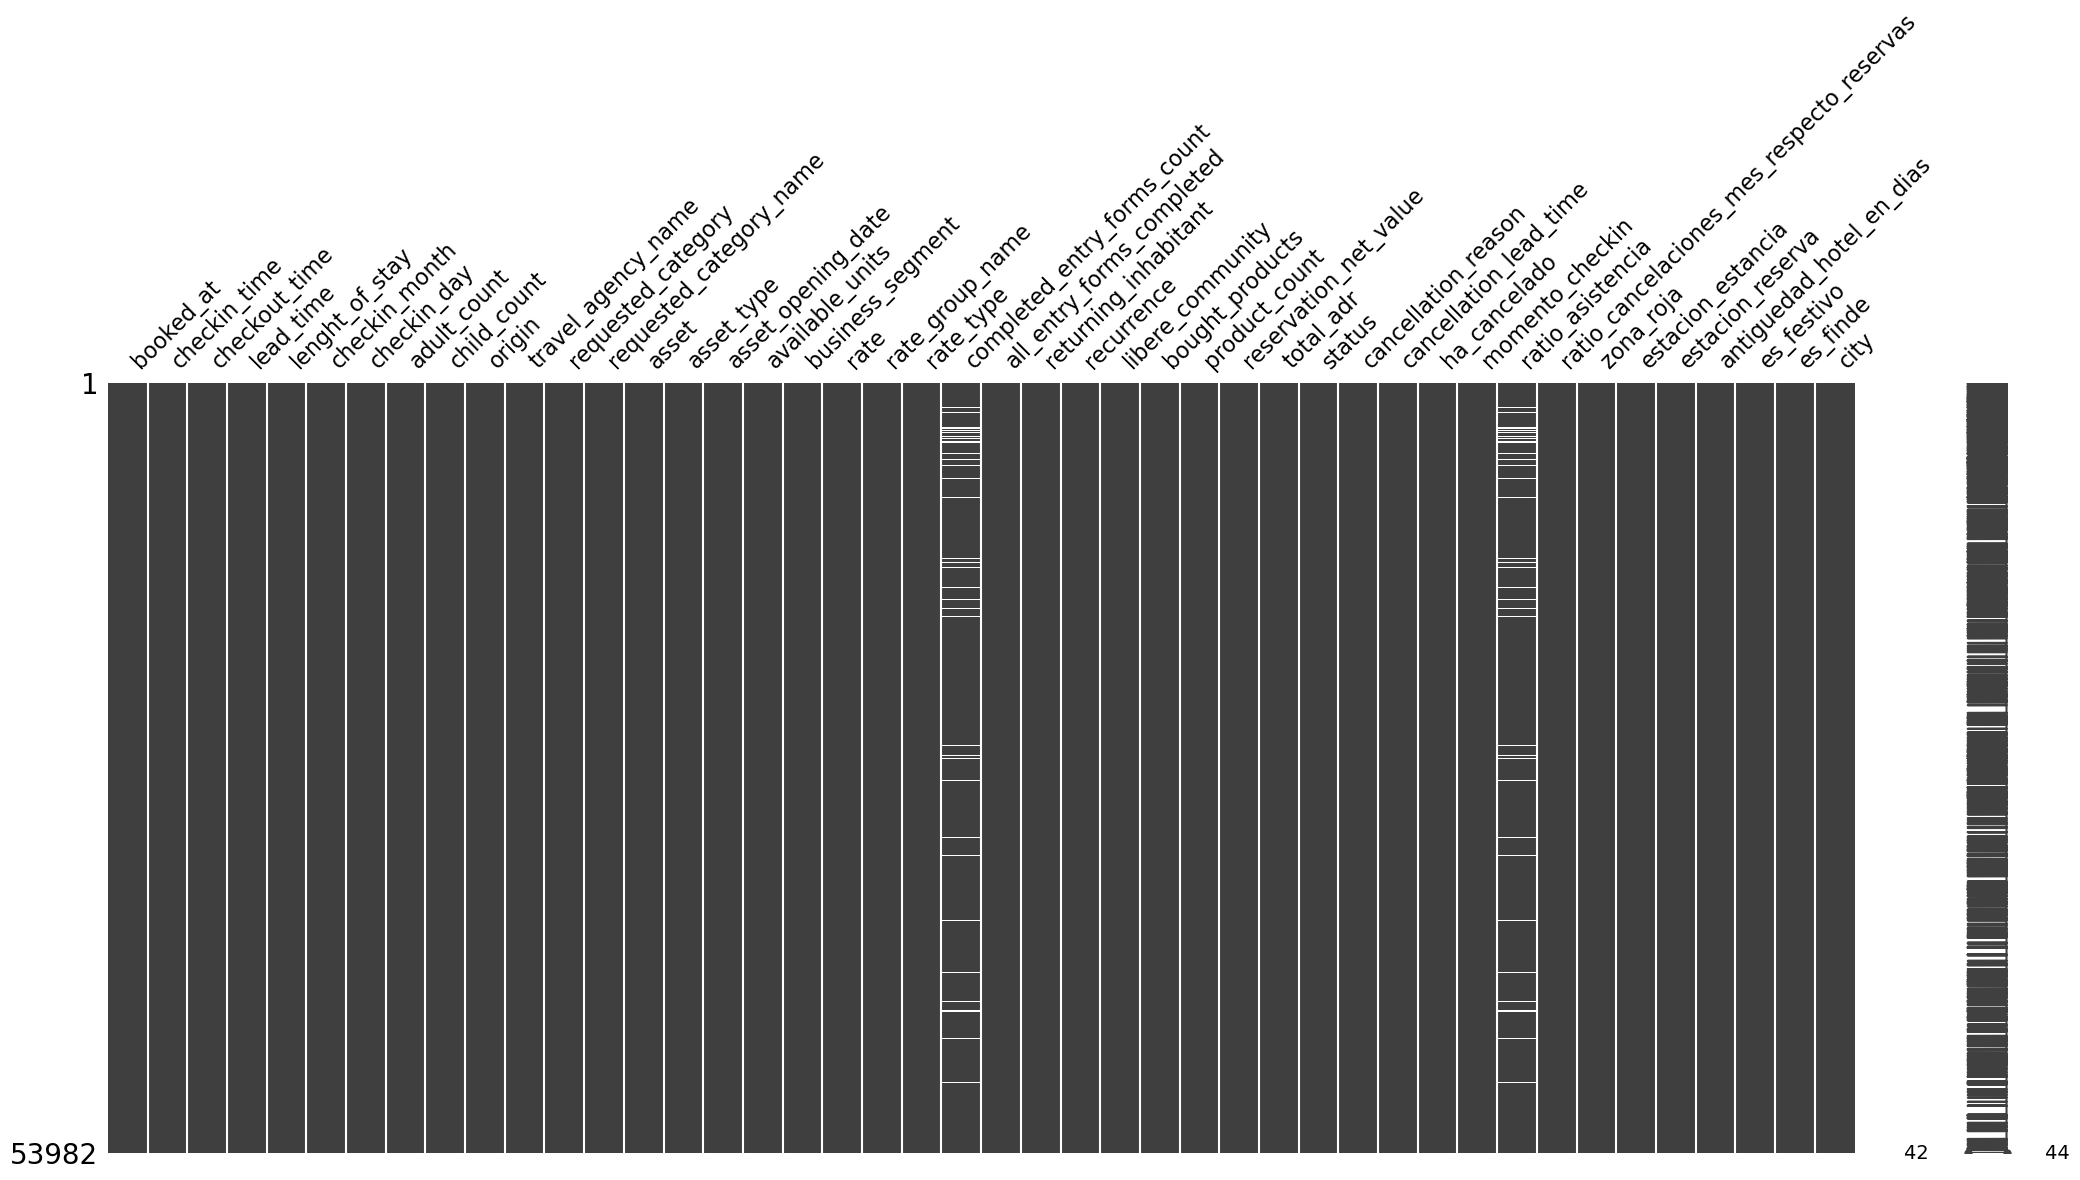

In [48]:
mo.matrix(df)

### miramos duplicados tras imputación

In [49]:
print(df.duplicated().sum()) # se han creado filas duplicadas --> eliminamos
print(df[df.duplicated])
df = df.drop_duplicates()
df.shape

1532
                booked_at        checkin_time       checkout_time  lead_time  \
85    2022-09-05 10:21:00 2023-01-04 15:00:00 2023-01-07 12:00:00        121   
140   2022-11-29 21:22:00 2023-01-08 15:00:00 2023-01-10 12:00:00         40   
141   2022-11-29 21:22:00 2023-01-08 15:00:00 2023-01-10 12:00:00         40   
142   2022-11-29 21:22:00 2023-01-08 15:00:00 2023-01-10 12:00:00         40   
143   2022-11-29 21:22:00 2023-01-08 15:00:00 2023-01-10 12:00:00         40   
...                   ...                 ...                 ...        ...   
53412 2023-09-22 16:40:00 2023-10-19 15:00:00 2023-10-20 11:00:00         27   
53415 2023-09-28 06:42:00 2023-10-19 15:00:00 2023-10-20 11:00:00         21   
53751 2023-11-12 13:47:00 2023-11-25 15:00:00 2023-11-26 11:00:00         13   
53959 2023-10-18 10:41:00 2023-12-30 15:00:00 2024-01-01 11:00:00         73   
53978 2023-10-13 13:38:00 2023-12-31 15:00:00 2024-01-01 11:00:00         79   

       lenght_of_stay checkin_mont

(52450, 44)

### GUARDAMOS EL DF LIMPIO Y CON LAS NUEVAS COLUMNAS CREADAS

In [51]:
ruta_csv = os.path.join("..", "..","Datos", "DatosTransformados", "df_limpio.csv")
df.to_csv(ruta_csv, index=False)
